Установка библиотек

In [13]:
!pip install pandas matplotlib seaborn numpy

Импорт библиотек

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

Фильтрация строк с нужным количеством столбцов

In [15]:
import pandas as pd

# Задание пути к исходному файлу
file_path = r'C:\Users\b1gtz\Desktop\Intensive parcing\Intensive\cian_parsing.csv'

# Фильтрация строк, оставляя только те, которые содержат 14 столбцов (13 запятых)
filtered_lines = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        if line.count(',') + 1 == 14:  # Проверка на наличие 14 столбцов
            filtered_lines.append(line)

# Сохранение отфильтрованных строк в новый CSV-файл
filtered_file_path = r'C:\Users\b1gtz\Desktop\Intensive parcing\Intensive\cian_parsing_filtered.csv'
with open(filtered_file_path, 'w', encoding='utf-8') as f:
    f.writelines(filtered_lines)

# Загрузка данных в DataFrame для дальнейшего анализа
data = pd.read_csv(filtered_file_path)

# Пример вывода обработанного DataFrame
print(data.head())


             Sminex          developer  Москва  sale  flat  12  2   86.1  \
0        ZIP Realty  real_estate_agent  Москва  sale  flat  20  3  110.7   
1       ID 18174647            realtor  Москва  sale  flat  31  5  246.7   
2            VESPER          developer  Москва  sale  flat   9  2  104.2   
3  Monumental Group  real_estate_agent  Москва  sale  flat   7  4  160.0   
4           SHOW ME  real_estate_agent  Москва  sale  flat  85  4  294.6   

   213680000.0            Хамовники  \
0  122000000.0          Пресненский   
1  287323255.0  Очаково-Матвеевское   
2  150958800.0             Тверской   
3   99999000.0             Тверской   
4  412440000.0          Пресненский   

                              Фрунзенская набережная    30      Фрунзенская  \
0                                          Костикова   4к1  Улица 1905 года   
1                                         Нежинская    1к1        Давыдково   
2                               1-я Тверская-Ямская      2       Маяков

Фильтрация аномальных значений

In [16]:
import pandas as pd

# Загрузка данных
filtered_file_path = r'C:\Users\b1gtz\Desktop\Intensive parcing\Intensive\cian_parsing_filtered.csv'
data = pd.read_csv(filtered_file_path)

# Вывод списка доступных столбцов для проверки имен
print("Список доступных столбцов:", data.columns)

# Определяем, какие из столбцов являются числовыми для анализа аномалий
numeric_columns = ['price', 'total_meters', 'floors_count', 'rooms_count']  # Проверим, что эти столбцы существуют

# Оставляем только существующие в файле числовые столбцы
available_numeric_columns = [col for col in numeric_columns if col in data.columns]

# Функция для фильтрации выбросов на основе IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Применение функции к данным
filtered_data = remove_outliers(data, available_numeric_columns)

# Сохранение отфильтрованных данных в новый CSV-файл
filtered_data_path = r'C:\Users\b1gtz\Desktop\Intensive parcing\Intensive\cian_parsing_no_outliers.csv'
filtered_data.to_csv(filtered_data_path, index=False)

print("Фильтрация аномальных значений завершена. Данные сохранены в", filtered_data_path)


Список доступных столбцов: Index(['Sminex', 'developer', 'Москва', 'sale', 'flat', '12', '2', '86.1',
       '213680000.0', 'Хамовники', 'Фрунзенская набережная', '30',
       'Фрунзенская', 'Клубный город-парк '],
      dtype='object')
Фильтрация аномальных значений завершена. Данные сохранены в C:\Users\b1gtz\Desktop\Intensive parcing\Intensive\cian_parsing_no_outliers.csv


Фильтрация дубликатов 
было: 11835
стало: 7943

In [17]:
import pandas as pd

# Загрузка очищенного файла с фильтрацией аномальных значений
filtered_data_path = r'C:\Users\b1gtz\Desktop\Intensive parcing\Intensive\cian_parsing_no_outliers.csv'
data = pd.read_csv(filtered_data_path)

# Удаление дубликатов по всем столбцам
data_no_duplicates = data.drop_duplicates()

# Альтернативно: удаление дубликатов по конкретным столбцам (например, 'author', 'location', 'price')
# data_no_duplicates = data.drop_duplicates(subset=['author', 'location', 'price'])

# Сохранение данных без дубликатов в новый файл
no_duplicates_file_path = r'C:\Users\b1gtz\Desktop\Intensive parcing\Intensive\cian_parsing_no_duplicates.csv'
data_no_duplicates.to_csv(no_duplicates_file_path, index=False)

print("Фильтрация дубликатов завершена. Данные сохранены в", no_duplicates_file_path)


Фильтрация дубликатов завершена. Данные сохранены в C:\Users\b1gtz\Desktop\Intensive parcing\Intensive\cian_parsing_no_duplicates.csv


Процент пропусков в каждом столбце

In [18]:
missing_percent = (data.isnull().sum() / len(data)) * 100
print("\nПроцент пропусков в каждом столбце:\n", missing_percent)


Процент пропусков в каждом столбце:
 Sminex                     1.235409
developer                  1.116128
Москва                     0.000000
sale                       0.000000
flat                       0.000000
12                         0.000000
2                          0.000000
86.1                       0.000000
213680000.0                0.664565
Хамовники                 48.785891
Фрунзенская набережная    15.651359
30                         8.034421
Фрунзенская                5.699923
Клубный город-парк        38.757775
dtype: float64


Добавляем цену за квадратный метр

In [19]:
import pandas as pd

# Загрузите файл данных
data = pd.read_csv(r'C:\Users\b1gtz\Desktop\Intensive parcing\Intensive\cian_parsing_no_duplicates.csv')  # Замените 'путь_к_файлу.csv' на путь к вашему файлу

# Проверьте названия столбцов
print("Названия столбцов до переименования:", data.columns)

# Переименование столбцов на основе предполагаемых индексов
# Здесь индекс 7 предполагается для общей площади, а 8 - для цены
data.columns.values[7] = 'total_meters'  # Столбец с площадью
data.columns.values[8] = 'price'         # Столбец с ценой

# Проверим названия столбцов после переименования
print("Названия столбцов после переименования:", data.columns)

# Добавление столбца с ценой за квадратный метр
if 'total_meters' in data.columns and 'price' in data.columns:
    data['price_per_sqm'] = data['price'] / data['total_meters']
    print("Столбец 'price_per_sqm' успешно добавлен.")
else:
    print("Не найдены столбцы 'total_meters' или 'price' для расчёта.")

# Сохраните обновленный файл
data.to_csv('обновленный_файл.csv', index=False)  # Замените на нужное имя файла


Названия столбцов до переименования: Index(['Sminex', 'developer', 'Москва', 'sale', 'flat', '12', '2', '86.1',
       '213680000.0', 'Хамовники', 'Фрунзенская набережная', '30',
       'Фрунзенская', 'Клубный город-парк '],
      dtype='object')
Названия столбцов после переименования: Index(['Sminex', 'developer', 'Москва', 'sale', 'flat', '12', '2',
       'total_meters', 'price', 'Хамовники', 'Фрунзенская набережная', '30',
       'Фрунзенская', 'Клубный город-парк '],
      dtype='object')
Столбец 'price_per_sqm' успешно добавлен.


Загружаем данные

In [20]:
# Определение названий столбцов
columns_names = ['author', 'author_type', 'location', 'deal_type', 'accommodation_type',
                 'floors_count', 'rooms_count', 'total_meters', 'price', 'district',
                 'street', 'house_number', 'metro', 'residential_complex', 'price_per_sqm']

# Загрузка данных из CSV-файла без заголовков
data = pd.read_csv(r"C:\Users\b1gtz\Desktop\Intensive parcing\обновленный_файл.csv", 
                   on_bad_lines="skip", header=None, names=columns_names)

# Проверка заголовков
print("Заголовки столбцов:", data.columns.tolist())


Заголовки столбцов: ['author', 'author_type', 'location', 'deal_type', 'accommodation_type', 'floors_count', 'rooms_count', 'total_meters', 'price', 'district', 'street', 'house_number', 'metro', 'residential_complex', 'price_per_sqm']


In [21]:
data.columns

Index(['author', 'author_type', 'location', 'deal_type', 'accommodation_type',
       'floors_count', 'rooms_count', 'total_meters', 'price', 'district',
       'street', 'house_number', 'metro', 'residential_complex',
       'price_per_sqm'],
      dtype='object')

In [22]:
columns_names = ['author', 'author_type', 'location', 'deal_type', 'accommodation_type', 'floors_count', 'rooms_count', 'total_meters', 'price', 'district', 'street', 'house_number', 'metro', 'residential_complex', 'price_per_sqm']
data = pd.read_csv(r"C:\Users\b1gtz\Desktop\Intensive parcing\обновленный_файл.csv", on_bad_lines="skip", names=columns_names)
data

,author,author_type,location,deal_type,accommodation_type,floors_count,rooms_count,total_meters,price,district,street,house_number,metro,residential_complex,price_per_sqm
0,Sminex,developer,Москва,sale,flat,12,2,total_meters,price,Хамовники,Фрунзенская набережная,30,Фрунзенская,Клубный город-парк,price_per_sqm
1,ZIP Realty,real_estate_agent,Москва,sale,flat,20,3,110.7,122000000.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky,1102077.6874435411
2,ID 18174647,realtor,Москва,sale,flat,31,5,246.7,287323255.0,Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера,1164666.6193757602
3,VESPER,developer,Москва,sale,flat,9,2,104.2,150958800.0,Тверской,1-я Тверская-Ямская,2,Маяковская,Vesper Tverskaya,1448740.8829174663
4,Monumental Group,real_estate_agent,Москва,sale,flat,7,4,160.0,99999000.0,Тверской,Тверская,27С2,Маяковская,NaN,624993.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,Оксана Гимишян,realtor,Москва,sale,flat,12,1,38.7,15000000.0,Раменки,Улофа Пальме,3,Минская,NaN,387596.89922480617
7939,ID 13544436,realtor,Москва,sale,flat,5,1,30.0,7400000.0,NaN,Жемчужная,1к14,Филатов Луг,NaN,246666.66666666666
7940,Авеню-Мск,real_estate_agent,Москва,sale,flat,14,1,43.5,12000000.0,Марьино,Перерва,26К2,Марьино,NaN,275862.0689655172
7941,СМАРЕНТ,real_estate_agent,Москва,sale,flat,12,1,34.8,9350000.0,Северное Измайлово,Щелковское шоссе,32,Щёлковская,NaN,268678.16091954027


In [23]:
median_floors= data['floors_count'].median()
data.loc[data['floors_count'] > 100, 'floors_count'] = median_floors
data.loc[data['floors_count'] < 0, 'floors_count'] = median_floors

data

,author,author_type,location,deal_type,accommodation_type,floors_count,rooms_count,total_meters,price,district,street,house_number,metro,residential_complex,price_per_sqm
0,Sminex,developer,Москва,sale,flat,12,2,total_meters,price,Хамовники,Фрунзенская набережная,30,Фрунзенская,Клубный город-парк,price_per_sqm
1,ZIP Realty,real_estate_agent,Москва,sale,flat,20,3,110.7,122000000.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky,1102077.6874435411
2,ID 18174647,realtor,Москва,sale,flat,31,5,246.7,287323255.0,Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера,1164666.6193757602
3,VESPER,developer,Москва,sale,flat,9,2,104.2,150958800.0,Тверской,1-я Тверская-Ямская,2,Маяковская,Vesper Tverskaya,1448740.8829174663
4,Monumental Group,real_estate_agent,Москва,sale,flat,7,4,160.0,99999000.0,Тверской,Тверская,27С2,Маяковская,NaN,624993.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,Оксана Гимишян,realtor,Москва,sale,flat,12,1,38.7,15000000.0,Раменки,Улофа Пальме,3,Минская,NaN,387596.89922480617
7939,ID 13544436,realtor,Москва,sale,flat,5,1,30.0,7400000.0,NaN,Жемчужная,1к14,Филатов Луг,NaN,246666.66666666666
7940,Авеню-Мск,real_estate_agent,Москва,sale,flat,14,1,43.5,12000000.0,Марьино,Перерва,26К2,Марьино,NaN,275862.0689655172
7941,СМАРЕНТ,real_estate_agent,Москва,sale,flat,12,1,34.8,9350000.0,Северное Измайлово,Щелковское шоссе,32,Щёлковская,NaN,268678.16091954027


In [24]:
median_rooms= data['rooms_count'].median()
data.loc[data['rooms_count'] < 0, 'rooms_count'] = median_rooms
data

,author,author_type,location,deal_type,accommodation_type,floors_count,rooms_count,total_meters,price,district,street,house_number,metro,residential_complex,price_per_sqm
0,Sminex,developer,Москва,sale,flat,12,2,total_meters,price,Хамовники,Фрунзенская набережная,30,Фрунзенская,Клубный город-парк,price_per_sqm
1,ZIP Realty,real_estate_agent,Москва,sale,flat,20,3,110.7,122000000.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky,1102077.6874435411
2,ID 18174647,realtor,Москва,sale,flat,31,5,246.7,287323255.0,Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера,1164666.6193757602
3,VESPER,developer,Москва,sale,flat,9,2,104.2,150958800.0,Тверской,1-я Тверская-Ямская,2,Маяковская,Vesper Tverskaya,1448740.8829174663
4,Monumental Group,real_estate_agent,Москва,sale,flat,7,4,160.0,99999000.0,Тверской,Тверская,27С2,Маяковская,NaN,624993.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,Оксана Гимишян,realtor,Москва,sale,flat,12,1,38.7,15000000.0,Раменки,Улофа Пальме,3,Минская,NaN,387596.89922480617
7939,ID 13544436,realtor,Москва,sale,flat,5,1,30.0,7400000.0,NaN,Жемчужная,1к14,Филатов Луг,NaN,246666.66666666666
7940,Авеню-Мск,real_estate_agent,Москва,sale,flat,14,1,43.5,12000000.0,Марьино,Перерва,26К2,Марьино,NaN,275862.0689655172
7941,СМАРЕНТ,real_estate_agent,Москва,sale,flat,12,1,34.8,9350000.0,Северное Измайлово,Щелковское шоссе,32,Щёлковская,NaN,268678.16091954027


Выделение числовых столбцов


In [25]:
numeric_columns = data.select_dtypes(include=np.number).columns

Гистограммы для всех числовых признаков

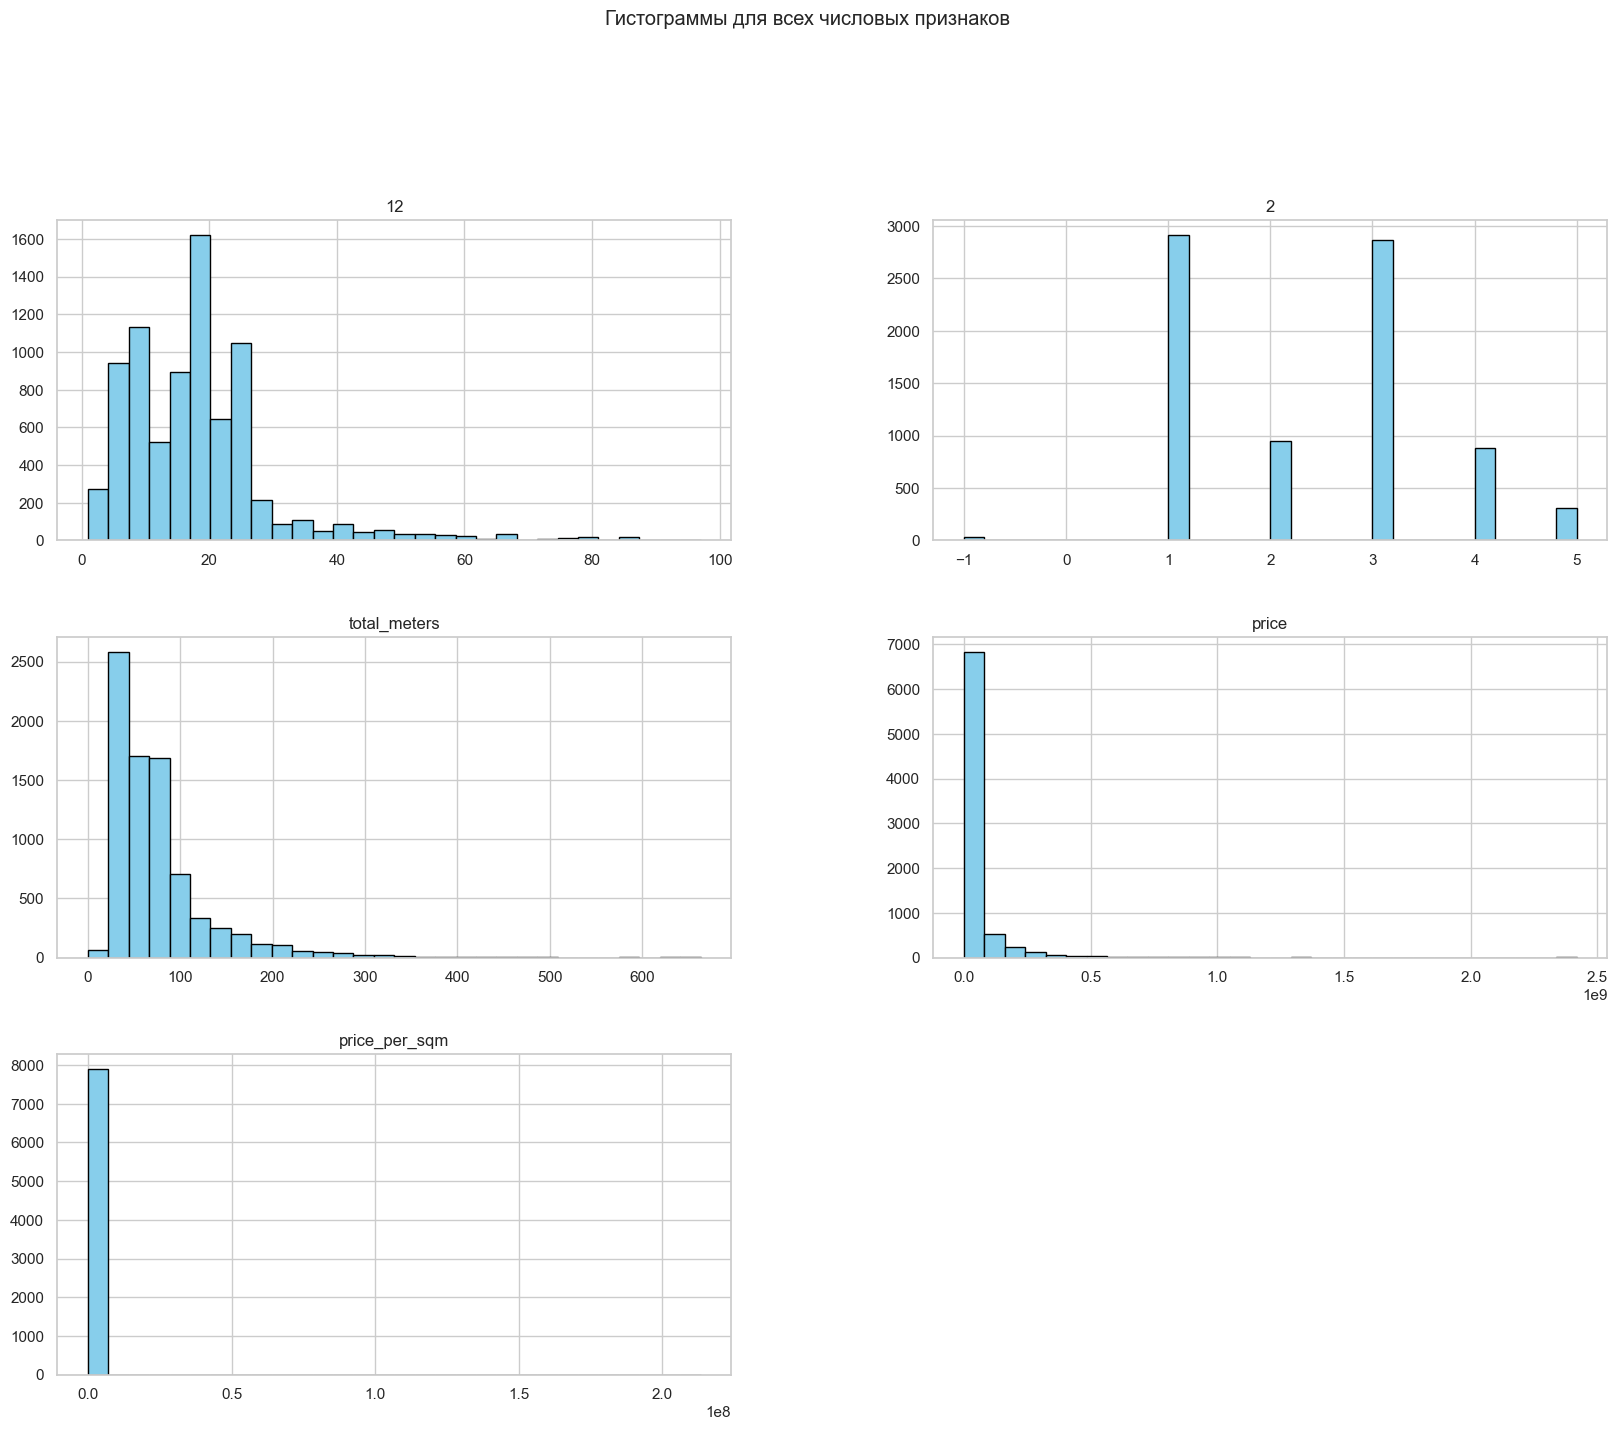

In [56]:
# Построение гистограмм для всех числовых признаков
numeric_data = data.select_dtypes(include=['number'])

# Построение гистограмм
numeric_data.hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Гистограммы для всех числовых признаков', y=1.02)
plt.show()


Корреляционная матрица

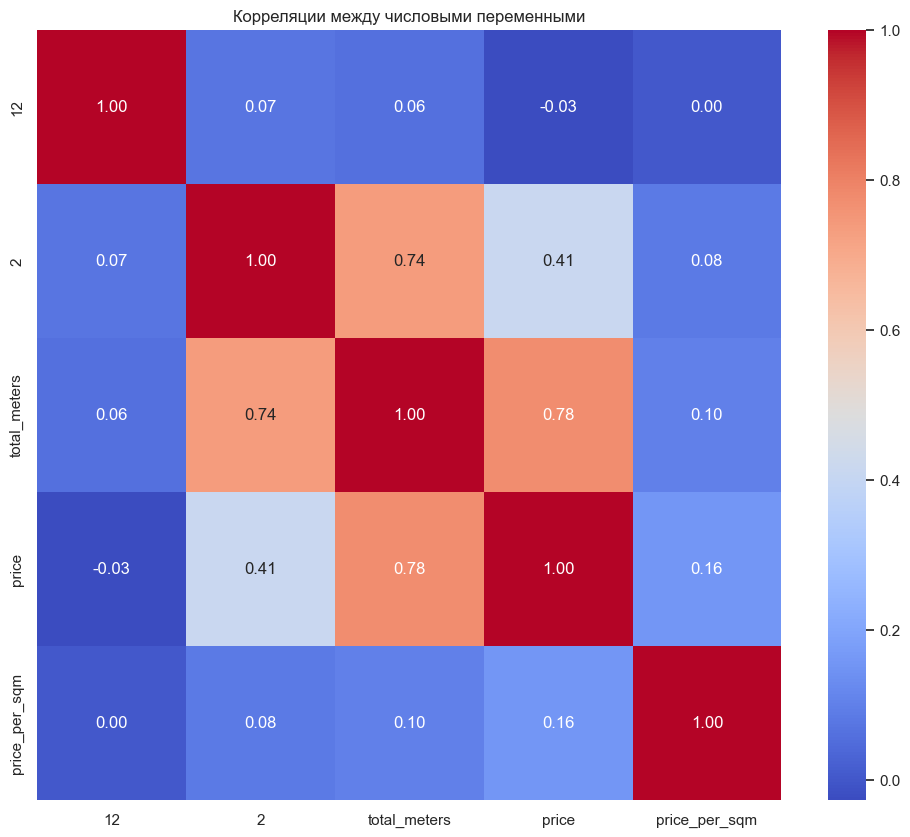

In [45]:
# Отфильтровать числовые столбцы
numeric_data = data.select_dtypes(include=['number'])

# Расчет корреляционной матрицы
corr_matrix = numeric_data.corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляции между числовыми переменными')
plt.show()


Scatter Plot для изучения взаимосвязей между признаками

C:\Users\b1gtz\AppData\Local\Temp\ipykernel_19876\2939028169.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_avg_price, x='area_category', y='price_per_sqm', palette='viridis')


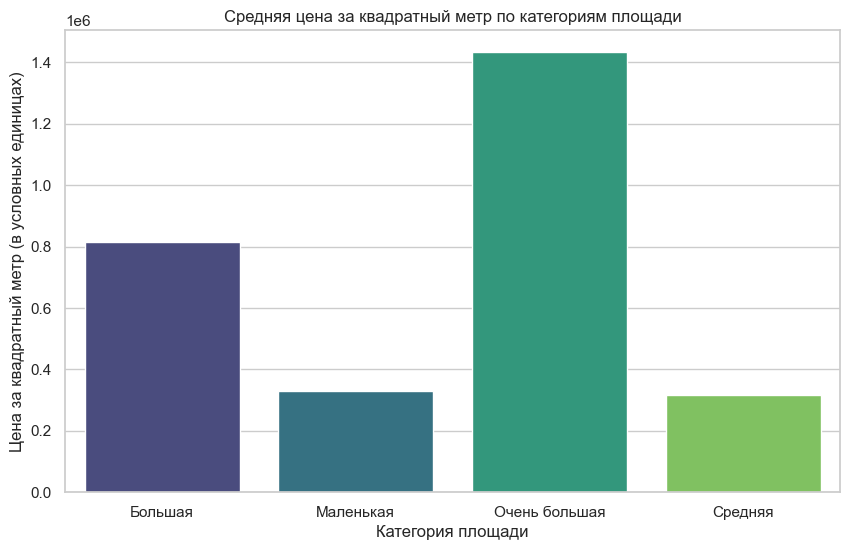

In [62]:
# Загрузка данных
file_path = r'C:\Users\b1gtz\Desktop\Intensive parcing\обновленный_файл.csv'
data = pd.read_csv(file_path)

# Функция для создания категорий площади
def categorize_area(size):
    if size < 50:
        return 'Маленькая'
    elif 50 <= size < 100:
        return 'Средняя'
    elif 100 <= size < 200:
        return 'Большая'
    else:
        return 'Очень большая'

# Создаем новый столбец для категории площади
data['area_category'] = data['total_meters'].apply(categorize_area)

# Вычисляем среднюю цену за квадратный метр для каждой категории площади
category_avg_price = data.groupby('area_category')['price_per_sqm'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=category_avg_price, x='area_category', y='price_per_sqm', palette='viridis')
plt.title("Средняя цена за квадратный метр по категориям площади")
plt.xlabel("Категория площади")
plt.ylabel("Цена за квадратный метр (в условных единицах)")
plt.show()

Диаграмма распределения с KDE для площади жилья

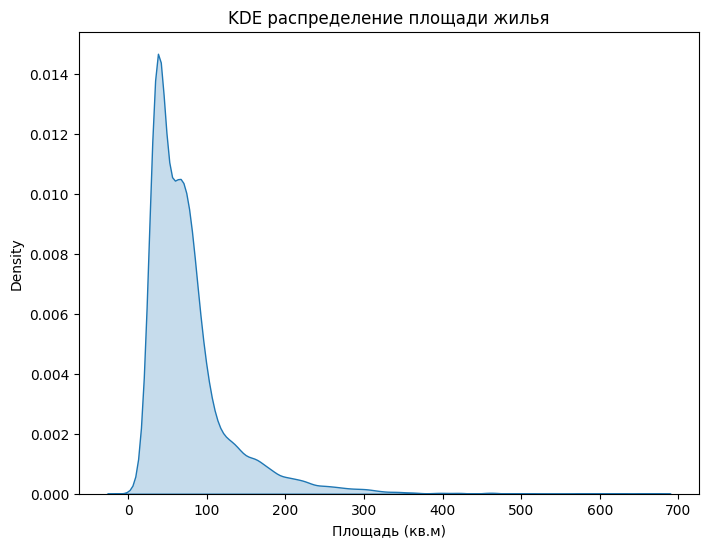

In [38]:
# Загрузка данных
data = pd.read_csv('обновленный_файл.csv')  # Замените на актуальный путь

# Преобразование данных в числовой формат, ошибки игнорируются
data['total_meters'] = pd.to_numeric(data['total_meters'], errors='coerce')

# Удаление пропущенных значений
data = data.dropna(subset=['total_meters'])

# Построение графика KDE
plt.figure(figsize=(8, 6))
sns.kdeplot(data['total_meters'], fill=True)
plt.title('KDE распределение площади жилья')
plt.xlabel('Площадь (кв.м)')
plt.show()

Распередение типов жилья (у нас получились только квартиры)

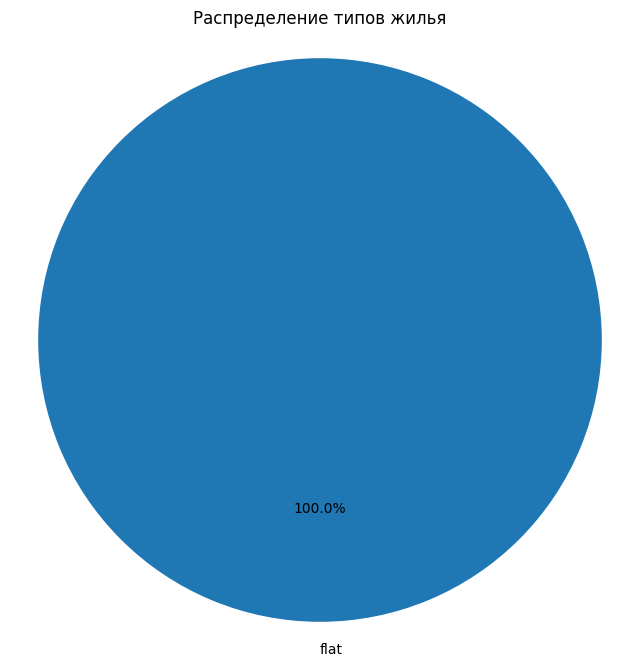

In [30]:
data = pd.read_csv('обновленный_файл.csv')

# Проверка наличия столбца
if 'flat' in data.columns:
    # Построение круговой диаграммы
    plt.figure(figsize=(8, 8))
    housing_type_counts = data['flat'].value_counts()
    plt.pie(housing_type_counts, labels=housing_type_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Распределение типов жилья')
    plt.axis('equal')  
    plt.show()
else:
    print("Столбец 'accommodation_type' отсутствует в данных.")

Распределение цен по районам (убрал названия, т.к было не читаемо)

C:\Users\b1gtz\AppData\Local\Temp\ipykernel_19876\3236411558.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Хамовники', y='price', palette='viridis')


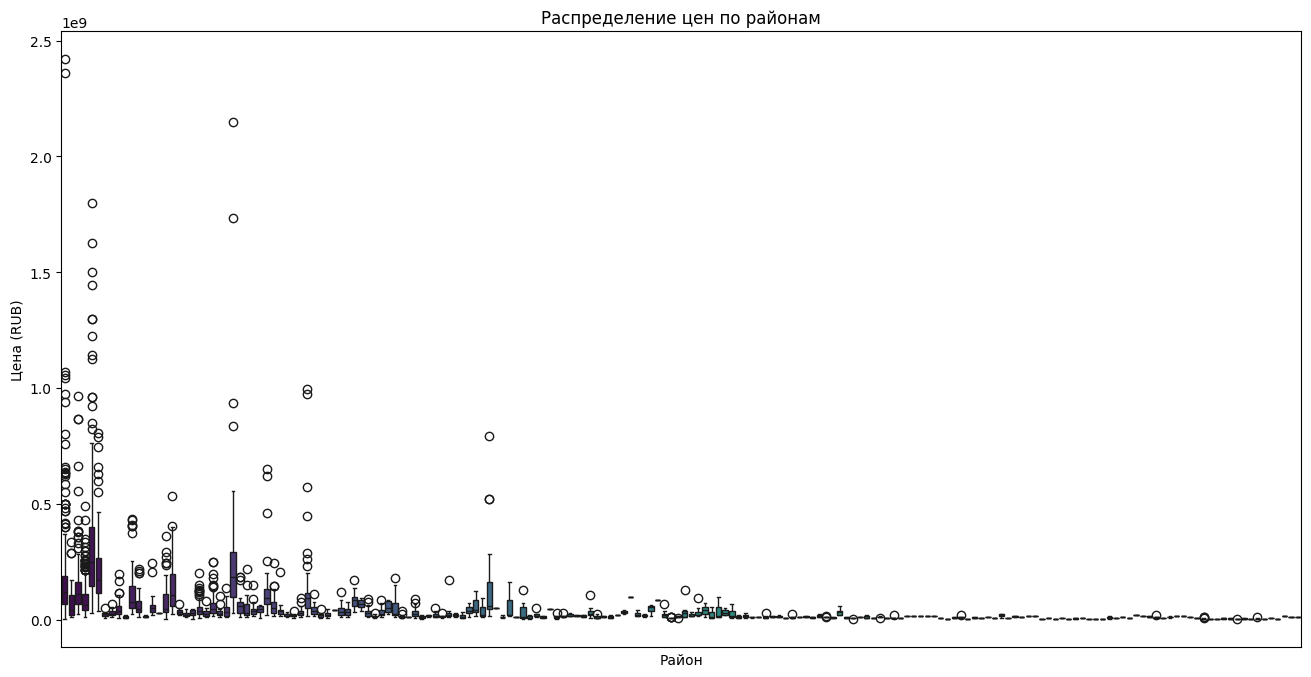

In [35]:
# Загрузка данных
data = pd.read_csv('обновленный_файл.csv')  # Замените на ваш актуальный путь

# Построение графика
plt.figure(figsize=(16, 8))
sns.boxplot(data=data, x='Хамовники', y='price', palette='viridis')
plt.xticks([])  # Скрыть названия районов
plt.title('Распределение цен по районам')
plt.xlabel('Район')
plt.ylabel('Цена (RUB)')
plt.show()

Цены по типам авторов

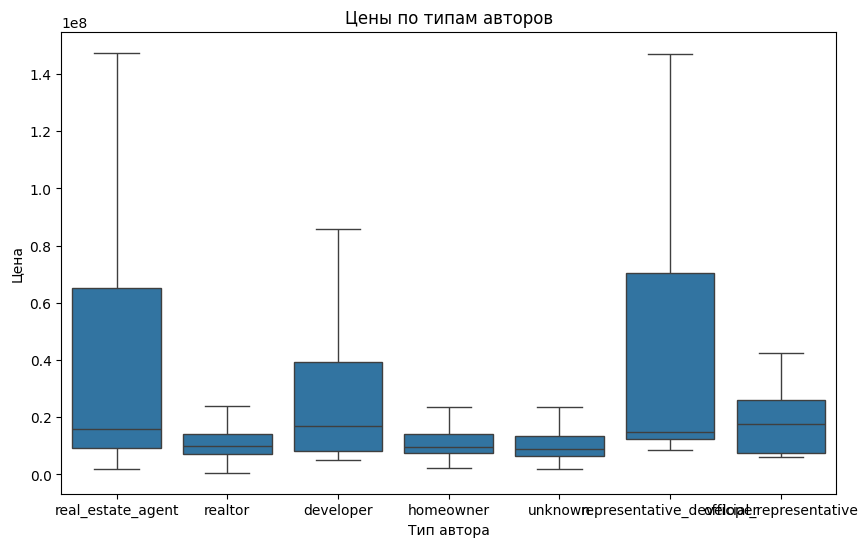

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='developer', y='price', showfliers=False)
plt.title('Цены по типам авторов')
plt.xlabel('Тип автора')
plt.ylabel('Цена')
plt.show()


Зависимость цены от площади

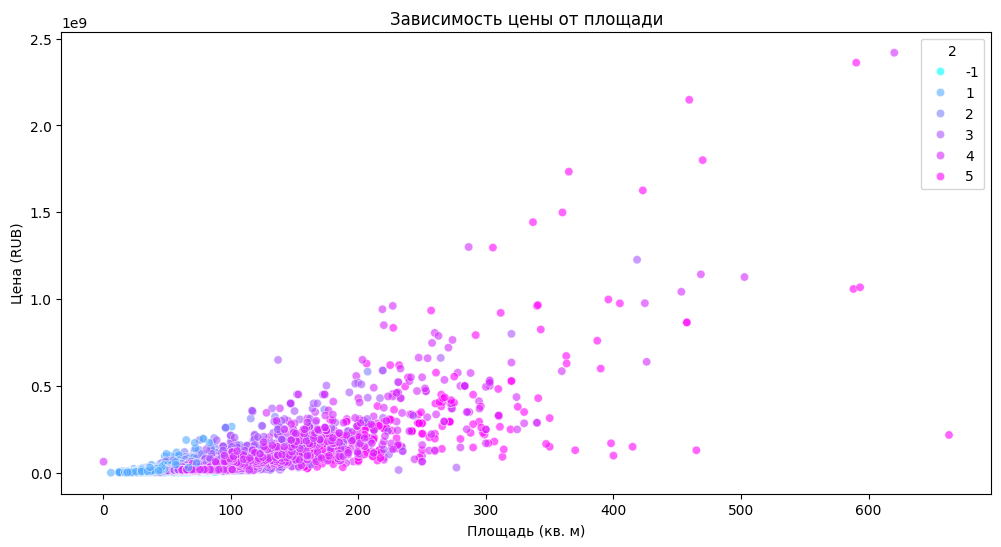

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='total_meters', y='price', hue='2', palette='cool', alpha=0.6)  # замените '2' на правильное имя столбца
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь (кв. м)')
plt.ylabel('Цена (RUB)')
plt.show()
